# Data Visualization with Matplotlib (image output)

## Random Walk

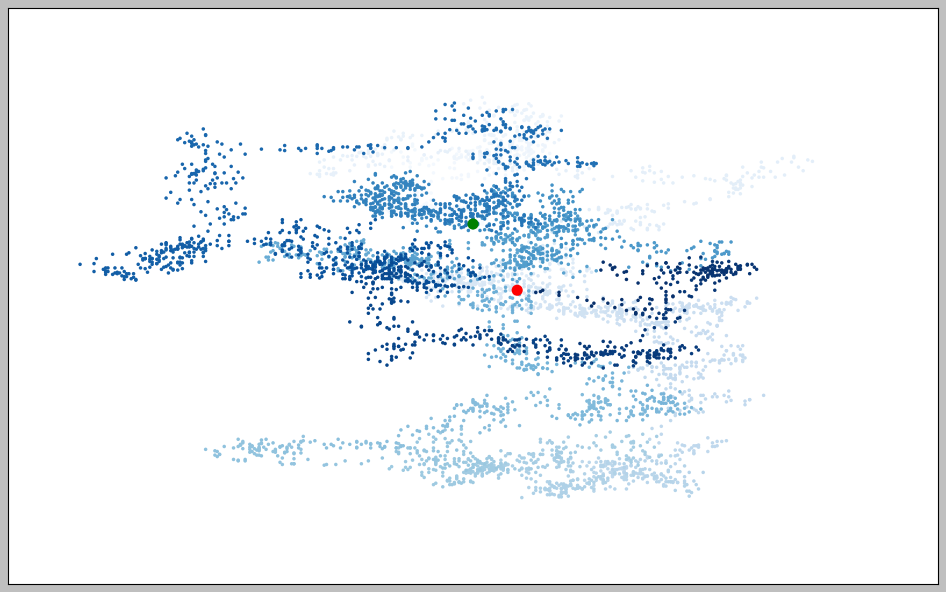

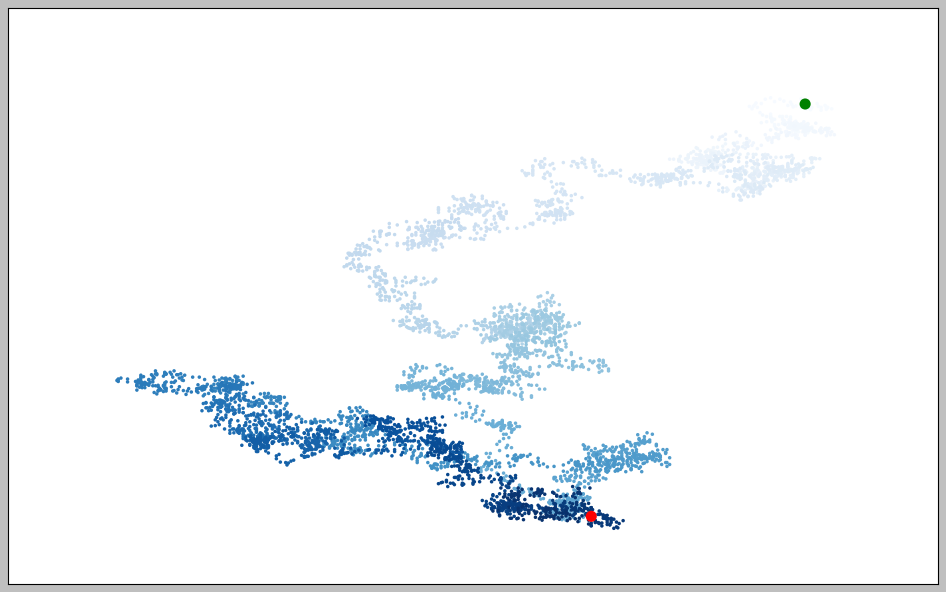

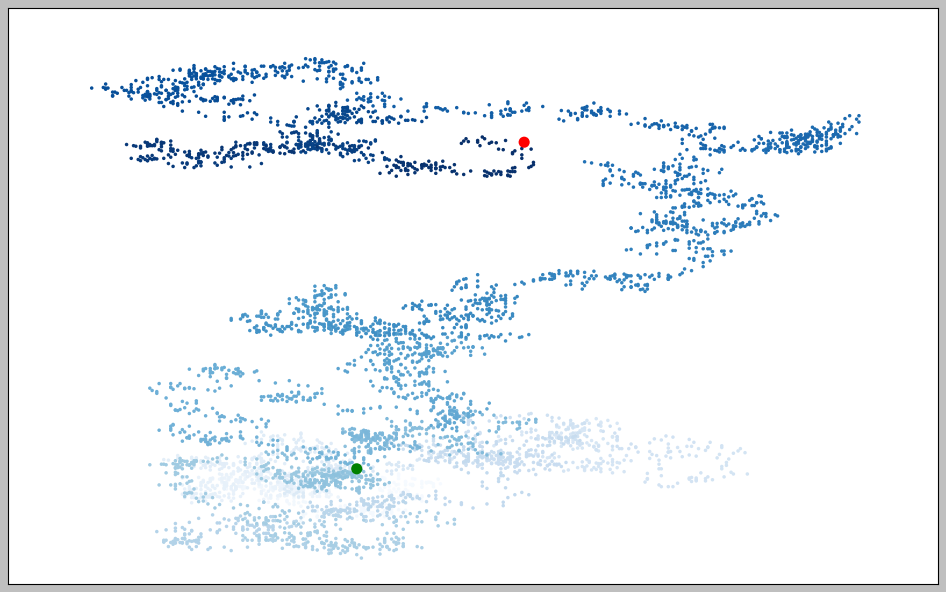

In [1]:
"""Random Walk"""
from random import choice

import matplotlib.pyplot as plt

class RandomWalk:
    """A class to generate random walk."""

    def __init__(self, num_points=5000):
        """Initialize attributes of a walk."""
        self.num_points = num_points

        # All walks starts at (0,0).
        self.x_values = [0]
        self.y_values = [0]

    def main(self, visual_way):
        """Generating multiple random walk and visualize it."""
        while True:
            rw = RandomWalk()
            rw.fill_walk()
            if visual_way == 'scatter':
                rw.scatter_visual()
            elif visual_way == 'plot':
                rw.plot_visual()

            keep_running = input("Make another walk? (y/n): ")
            if keep_running == 'n':
                break

    def fill_walk(self):
        """Calculate all the points in the walk."""
        while len(self.x_values) < self.num_points:

            x_step = self.get_step()
            y_step = self.get_step()
            # Reject moves that go nowhere.
            if x_step == 0 and y_step == 0:
                continue

            x_values = self.x_values[-1] + x_step
            y_values = self.y_values[-1] + y_step

            self.x_values.append(x_values)
            self.y_values.append(y_values)

    def get_step(self):
        """Determine the direction and distance for each step."""
        direction = choice([1, -1])
        distance = choice(range(9))
        step = direction * distance
        return step

    def scatter_visual(self):
        """Scatter the points in the walk."""
        plt.style.use('classic')
        fig, ax = plt.subplots(figsize=(15, 9))
        point_numbers = range(self.num_points)
        ax.scatter(self.x_values, self.y_values, c=point_numbers,
                   cmap=plt.cm.Blues, edgecolors='none', s=10)

        # Empasize the first and last points.
        ax.scatter(0, 0, c='green', edgecolors='none', s=100) # starting point
        ax.scatter(self.x_values[-1], self.y_values[-1],
                   c='red', edgecolors='none', s=100) # ending point

        self.show(ax)

    def plot_visual(self):
        """Plot the points in the walk."""
        plt.style.use('seaborn')
        fig, ax = plt.subplots(figsize=(15, 9))
        ax.plot(self.x_values, self.y_values, linewidth=1)

        # Empasize the first and last points.
        ax.scatter(0, 0, c='green', edgecolors='none', s=100) # starting point
        ax.scatter(self.x_values[-1], self.y_values[-1],
                   c='red', edgecolors='none', s=100) # ending point

        self.show(ax)

    def show(self, plot):
        """Show the graph."""
        # Remove the axes.
        plot.get_xaxis().set_visible(False)
        plot.get_yaxis().set_visible(False)

        #plt.show()
        plt.savefig('cube_plot.png', bbox_inches='tight')

RandomWalk(10_000).main('scatter')
#RandomWalk(5000).main('plot')

## Cubes

### Line Graph

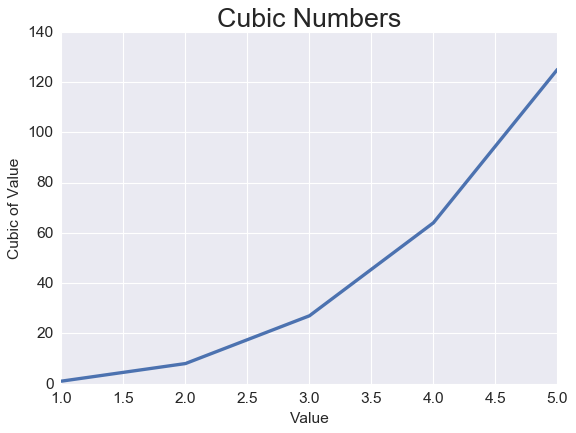

In [3]:
"""Plotting a simple line graph."""
import matplotlib.pyplot as plt

def main():
    """Plotting a line graph with given."""
    input_values = [1, 2, 3, 4, 5]
    output_values = [1, 8, 27, 64, 125]

    plt.style.use('seaborn')
    fig, ax = plt.subplots()
    ax.plot(input_values, output_values, linewidth=3)

    # Set chart title and label axes.
    ax.set_title("Cubic Numbers", fontsize=24)
    ax.set_xlabel("Value", fontsize=14)
    ax.set_ylabel("Cubic of Value", fontsize=14)

    # Set size of tick labels.
    ax.tick_params(axis='both', labelsize=14)

    plt.show()

main()

### Scatter

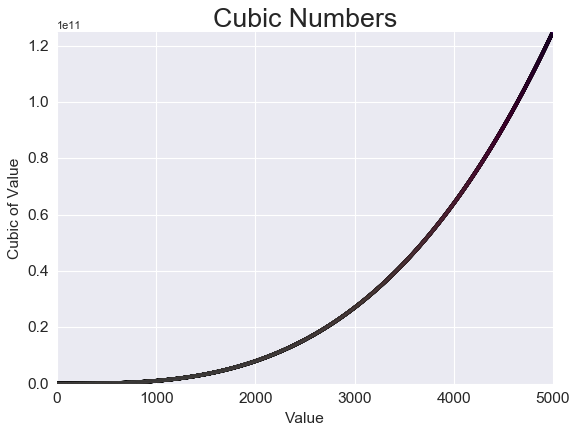

In [4]:
"""Plotting with scatter()."""
import matplotlib.pyplot as plt

def main():
    """
    Plot the cubic values of the first 5000 cubic numbers
    with scatter() and apply colormap.
    """
    x_values = range(1, 5001)
    y_values = [x**3 for x in x_values]

    fig, ax = plt.subplots()
    ax.scatter(x_values, y_values, c=y_values, cmap=plt.cm.RdPu, s=10)

    # Set chart title and label axes.
    ax.set_title("Cubic Numbers", fontsize=24)
    ax.set_xlabel("Value", fontsize=14)
    ax.set_ylabel("Cubic of Value", fontsize=14)

    # Set size of tick labels.
    ax.tick_params(axis='both', which='major', labelsize=14)

    # Set the range for each axis.
    ax.axis([0, 5000, 0, 5000**3])

    plt.show()
    #plt.savefig('cube_plot.png', bbox_inches='tight')

main()

## Weather data visualization
Reading and visualizing CSV format data.

In [ ]:
"""Weather"""
import csv
from datetime import datetime

import matplotlib.pyplot as plt

filename = 'weather_visual/data/death_valley_2018_simple.csv'
fhand = open(filename)
reader = csv.reader(fhand)
header_row = next(reader)

header= {}
for index, column_header in enumerate(header_row):
    header[column_header] = index

dates, lows, highs = [], [], []
for row in reader:
    current_date = datetime.strptime(row[header['DATE']], '%Y-%m-%d')
    name = row[header['NAME']]
    try:
        high = int(row[header['TMAX']])
        low = int(row[header['TMIN']])
    except ValueError:
        print(f"Missing data for {current_date}")
    else:
        dates.append(current_date)
        highs.append(high)
        lows.append(low)

# Plot the high temperatures.
plt.style.use('seaborn')
fig, ax = plt.subplots()
ax.plot(dates, highs, c='red', alpha=0.5)
ax.plot(dates, lows, c='blue', alpha=0.5)
plt.fill_between(dates, highs, lows, facecolor='blue', alpha=0.1)

# Format plot
title = f"Daily high and low temperatures - 2018\n{name}"
plt.title(title, fontsize=20)
plt.xlabel('', fontsize=16)
fig.autofmt_xdate()
plt.ylabel("Temperature (F)", fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)

plt.show()
#plt.savefig('death_valley_high_low_temp.png', bbox_inches='tight')
fhand.close()